# Hand Written Digit Recognition

# Handwritten digits classification using neural network
In this notebook let's classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
pip install tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=763b6d236f8232bb9005f1f62d3755683e85d0b612eb89b67697d0269d90e256
  Stored in directory: c:\users\ravis1\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=5cd65c5f83d83b8295b31f532156229416079ebe8f7b0004e0b5cce40f92d22d
  Stored in directory: c:\users\ravis1\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import packages

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [104]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [105]:
len(X_train)

60000

In [106]:
len(y_train)

60000

In [107]:
len(X_test)

10000

In [108]:
len(y_test)

10000

In [109]:
X_train.shape

(60000, 28, 28)

In [110]:
X_test.shape

(10000, 28, 28)

In [111]:
X_train[0].shape

(28, 28)

In [112]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

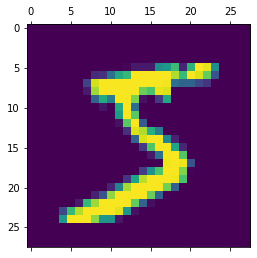

In [113]:
plt.matshow(X_train[0])

In [114]:
y_train[0]

5

In [115]:
X_train = X_train / 255
X_test = X_test / 255

In [116]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [117]:
X_train_flattened.shape

(60000, 784)

# Simple Neural Network

In [118]:
#Model without hidden layer

In [119]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 525us/step - loss: 0.4694 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 1s 522us/step - loss: 0.3030 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 521us/step - loss: 0.2728 - accuracy: 0.92380s - loss: 0.2714 - accuracy
Epoch 5/5
1875/1875 [==============================] - 1s 534us/step - loss: 0.2661 - accuracy: 0.9259


In [120]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 428us/step - loss: 0.2693 - accuracy: 0.9251


[0.2693433463573456, 0.9251000285148621]

In [121]:
y_predict = model.predict(X_test_flattened)
y_predict[1]

array([7.2633755e-01, 6.4781010e-03, 9.9977481e-01, 7.1323121e-01,
       1.2911194e-09, 9.4037616e-01, 9.4371432e-01, 1.3671529e-12,
       3.8639930e-01, 7.4743687e-09, 5.2721424e-07, 1.7197574e-07,
       6.1862721e-07, 8.1229888e-07, 3.6221152e-07, 1.1981901e-07,
       1.8874442e-07, 6.7528546e-08, 7.4614242e-08, 1.1527937e-07],
      dtype=float32)

In [122]:
np.argmax(y_predict[1])

2

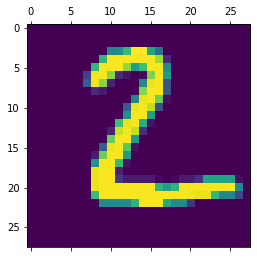

In [123]:
plt.matshow(X_test[1])

In [141]:
#Plot the Confusion Matrix

In [142]:
y_predicted_labels =[np.argmax(i) for i in y_predict]

In [143]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [144]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)

In [145]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    2,    1,    2,    2,    0],
       [   0, 1122,    4,    1,    0,    1,    2,    0,    5,    0],
       [   6,    2,  990,   11,    6,    2,    4,    5,    6,    0],
       [   0,    2,    4,  967,    0,   27,    0,    4,    3,    3],
       [   0,    1,    0,    1,  949,    1,    7,    3,    4,   16],
       [   2,    0,    0,    1,    1,  881,    1,    1,    4,    1],
       [   8,    3,    1,    0,    3,    8,  933,    1,    1,    0],
       [   0,    7,    7,    2,    1,    1,    0,  999,    2,    9],
       [   6,    0,    1,    4,    0,    9,    2,    4,  945,    3],
       [   4,    3,    0,    5,    9,    6,    1,    2,    6,  973]])>

Text(69.0, 0.5, 'Truth')

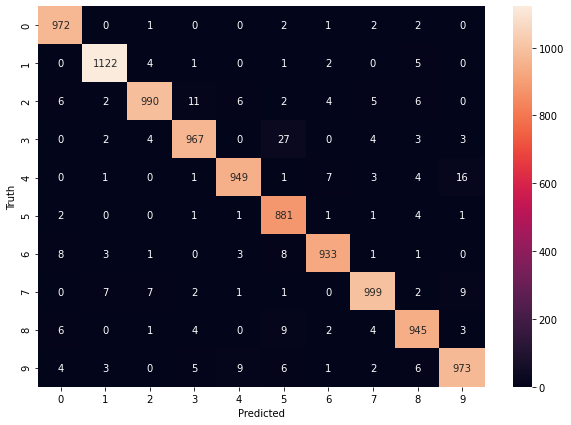

In [146]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model with a hidden layer

In [153]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 669us/step - loss: 0.2737 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.1234 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 1s 549us/step - loss: 0.0855 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 1s 523us/step - loss: 0.0663 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 1s 528us/step - loss: 0.0526 - accuracy: 0.9838


In [154]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 531us/step - loss: 0.0825 - accuracy: 0.9749


[0.08246399462223053, 0.9749000072479248]

In [155]:
y_predict = model.predict(X_test_flattened)

In [156]:
y_predict

array([[2.0131946e-02, 6.0930848e-04, 6.5605730e-01, ..., 9.9998564e-01,
        3.8925707e-02, 5.9427285e-01],
       [1.5231907e-02, 9.9650770e-01, 9.9999940e-01, ..., 2.4023592e-08,
        2.1652117e-01, 1.4357571e-06],
       [3.1124651e-03, 9.9873245e-01, 2.4849108e-01, ..., 2.5754362e-01,
        1.6168857e-01, 3.4548938e-03],
       ...,
       [3.8201215e-08, 4.2062998e-04, 7.8096877e-05, ..., 5.3858548e-01,
        7.3003054e-02, 8.5791588e-01],
       [2.0624399e-03, 1.3386518e-02, 2.9936433e-04, ..., 8.4260106e-04,
        9.9859875e-01, 1.2167636e-04],
       [5.3833568e-01, 4.9980281e-07, 8.4452724e-01, ..., 7.0532911e-07,
        3.2839179e-04, 1.9243360e-04]], dtype=float32)

In [157]:
y_predict[0]

array([2.0131946e-02, 6.0930848e-04, 6.5605730e-01, 9.8931628e-01,
       4.2217579e-07, 4.4760287e-02, 9.3241212e-08, 9.9998564e-01,
       3.8925707e-02, 5.9427285e-01], dtype=float32)

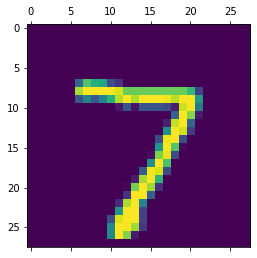

In [158]:
plt.matshow(X_test[0])

In [159]:
np.argmax(y_predict[0])

7

In [160]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [161]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [162]:
cm1 = tf.math.confusion_matrix(labels = y_test,predictions =y_predicted_labels)

In [163]:
cm1


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    2,    2,    2,    1,    0],
       [   0, 1126,    4,    0,    0,    0,    2,    0,    3,    0],
       [   3,    2, 1013,    2,    1,    0,    3,    4,    4,    0],
       [   0,    0,    5,  997,    0,    0,    0,    2,    3,    3],
       [   3,    0,    5,    2,  948,    0,    5,    4,    2,   13],
       [   2,    1,    0,   21,    2,  856,    3,    1,    5,    1],
       [   3,    2,    4,    1,    4,    4,  938,    0,    2,    0],
       [   1,    7,   11,    4,    0,    0,    0,  999,    0,    6],
       [   4,    1,    7,   20,    4,    2,    2,    3,  928,    3],
       [   3,    5,    2,    9,    8,    1,    0,    8,    1,  972]])>

Text(69.0, 0.5, 'Truth')

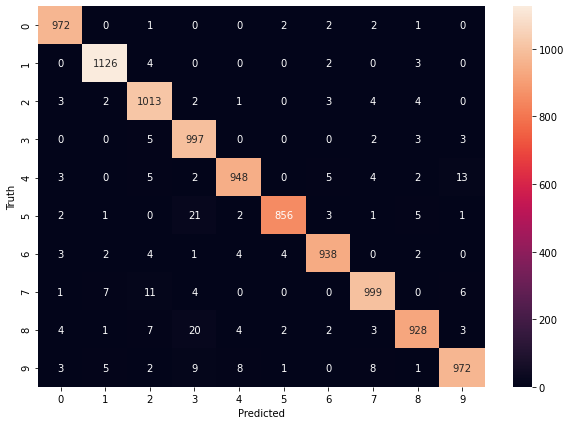

In [164]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')